CDC NNDSS - Table I. infrequently reported notifiable diseases 
Data for this can be viewed and downloaded at https://healthdata.gov/dataset/nndss-table-i-infrequently-reported-notifiable-diseases-1

The purpose of this data is to analyze the top 3-5 diseases throughout all twelve months and years 2013-2017. 

In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline

In [586]:
# Read the csv file
df18 = pd.read_csv("18_NNDSS.csv")
df18.head()

,Disease,MMWR year,MMWR week,Current week,"Current week, flag",Cum 2018,"Cum 2018, flag",5-year weekly average§,"5-year weekly average§, flag",Total cases reported for pervious years 2017,"Total cases reported for pervious years 2017, flag",Total cases reported for pervious years 2016,"Total cases reported for pervious years 2016, flag",Total cases reported for pervious years 2015,"Total cases reported for pervious years 2015, flag",Total cases reported for pervious years 2014,"Total cases reported for pervious years 2014, flag",Total cases reported for pervious years 2013,"Total cases reported for pervious years 2013, flag",States reporting cases during current week (No.)
0,Anthrax,2018.0,1.0,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,6.0,NaN,115.0,NaN,247.0,NaN,896.0,NaN,NaN,NN,NaN,NN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,3.0,NaN,7.0,NaN,6.0,NaN,8.0,NaN,8.0,NaN,NaN
3,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,67.0,NaN,15.0,NaN,11.0,NaN,11.0,NaN,22.0,NaN,NaN
4,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,NaN,-,44.0,NaN,35.0,NaN,55.0,NaN,80.0,NaN,85.0,NaN,NaN


In [587]:
# Clean up the column headers
df18.columns = df18.columns.str.strip().str.lower().str.replace('  ', ' ').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [588]:
# Delete unnecessary columns
columns_to_drop = ['current_week', 'current_week,_flag', 'cum_2018', 'cum_2018,_flag', '5-year_weekly_average§', 
                   '5-year_weekly_average§,_flag', 'total_cases_reported_for_pervious_years_2017,_flag', 
                   'total_cases_reported_for_pervious_years_2016,_flag', 
                   'total_cases_reported_for_pervious_years_2015,_flag', 
                   'total_cases_reported_for_pervious_years_2014,_flag', 
                   'total_cases_reported_for_pervious_years_2013,_flag', 
                   'states_reporting_cases_during_current_week_no.']

df18.drop(columns_to_drop, inplace=True, axis=1)

In [589]:
# Delete non ASCII characters
df18['disease'] = df18['disease'].apply(lambda x: ''.join([" " if (ord(i) < 32 or ord(i) > 126) or ord(i) == 42  else i for i in x]))

In [590]:
df18.head()

,disease,mmwr_year,mmwr_week,total_cases_reported_for_pervious_years_2017,total_cases_reported_for_pervious_years_2016,total_cases_reported_for_pervious_years_2015,total_cases_reported_for_pervious_years_2014,total_cases_reported_for_pervious_years_2013
0,Anthrax,2018.0,1.0,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,115.0,247.0,896.0,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,3.0,7.0,6.0,8.0,8.0
3,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,67.0,15.0,11.0,11.0,22.0
4,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,44.0,35.0,55.0,80.0,85.0


In [591]:
# Shorten some of the column names
df18.columns = df18.columns.str.replace('_reported_for_pervious_years_', '_')

In [592]:
#Reorder columns
df18 = df18[[ 'disease','mmwr_week', 'total_cases_2013', 'total_cases_2014', 'total_cases_2015', 'total_cases_2016', 'total_cases_2017']]
df18

,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
0,Anthrax,1.0,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",1.0,NaN,NaN,896.0,247.0,115.0
2,"Arboviral diseases, neuroinvasive and nonneur...",1.0,8.0,8.0,6.0,7.0,3.0
3,"Arboviral diseases, neuroinvasive and nonneur...",1.0,22.0,11.0,11.0,15.0,67.0
4,"Arboviral diseases, neuroinvasive and nonneur...",1.0,85.0,80.0,55.0,35.0,44.0
...,...,...,...,...,...,...,...
3388,Diphtheria,49.0,NaN,1.0,NaN,NaN,NaN
3389,Diphtheria,43.0,NaN,1.0,NaN,NaN,NaN
3390,Diphtheria,45.0,NaN,1.0,NaN,NaN,NaN
3391,Diphtheria,50.0,NaN,1.0,NaN,NaN,NaN


In [593]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393 entries, 0 to 3392
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disease           3393 non-null   object 
 1   mmwr_week         3392 non-null   float64
 2   total_cases_2013  2225 non-null   float64
 3   total_cases_2014  2385 non-null   float64
 4   total_cases_2015  2491 non-null   float64
 5   total_cases_2016  2332 non-null   float64
 6   total_cases_2017  2345 non-null   float64
dtypes: float64(6), object(1)
memory usage: 185.7+ KB


In [594]:
# Replace null values with 0
cols = ['mmwr_week', 'total_cases_2017', 'total_cases_2016', 'total_cases_2015', 
                'total_cases_2014', 'total_cases_2013']


df18[cols] = df18[cols].fillna(0)
#astype(int)

In [595]:
df18.isnull().sum()

disease             0
mmwr_week           0
total_cases_2013    0
total_cases_2014    0
total_cases_2015    0
total_cases_2016    0
total_cases_2017    0
dtype: int64

In [596]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393 entries, 0 to 3392
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disease           3393 non-null   object 
 1   mmwr_week         3393 non-null   float64
 2   total_cases_2013  3393 non-null   float64
 3   total_cases_2014  3393 non-null   float64
 4   total_cases_2015  3393 non-null   float64
 5   total_cases_2016  3393 non-null   float64
 6   total_cases_2017  3393 non-null   float64
dtypes: float64(6), object(1)
memory usage: 185.7+ KB


In [597]:
# Check for duplicate rows
sum(df18.duplicated())

58

In [598]:
has_duplicate = df18.duplicated()

duplicates = df18[has_duplicate]

duplicates

,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
2048,"Meningococcal disease, Unknown serogroup",32.0,298.0,196.0,120.0,142.0,131.0
2050,Streptococcal toxic-shock syndrome,32.0,224.0,259.0,335.0,283.0,372.0
2051,"Hepatitis B, perinatal infection",32.0,48.0,47.0,37.0,34.0,31.0
2052,"Arboviral diseases, neuroinvasive and nonneur...",32.0,8.0,8.0,6.0,7.0,5.0
2054,"Botulism, total",32.0,152.0,161.0,195.0,201.0,177.0
2055,Chancroid,32.0,0.0,0.0,11.0,11.0,7.0
2056,Vancomycin-resistant Staphylococcus aureus,32.0,0.0,0.0,3.0,0.0,0.0
2057,Plague,32.0,4.0,10.0,16.0,4.0,1.0
2058,"Botulism, infant",32.0,136.0,127.0,138.0,144.0,137.0
2059,"Haemophilus influenzae, invasive disease, age ...",32.0,233.0,266.0,135.0,159.0,189.0


In [599]:
#Week 32 has duplicate data, need to drop duplicates
df18.drop_duplicates(inplace = True)

sum(df18.duplicated())

0

In [600]:
# Filter out diseases with 0 cases between 2013-2017
df18 = df18[(df18.total_cases_2017 > 0) | (df18.total_cases_2016 > 0) | (df18.total_cases_2015 > 0)| (df18.total_cases_2014 > 0) & (df18.total_cases_2013 > 0)]

In [601]:
df18.shape

(2449, 7)

In [602]:
#Stripping white spaces
df18.disease = df18.disease.str.strip()

C:\Users\kelly\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [603]:
# Added all cases for all weeks per disease in a new dataframe
df18_sum = df18.groupby('disease').sum()
df18_sum

,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
disease,,,,,,
"Arboviral diseases , Chikungunya virus",34.0,0.0,0.0,896.0,247.0,156.0
"Arboviral diseases , Eastern equine encephalitis virus",34.0,8.0,8.0,6.0,7.0,5.0
"Arboviral diseases , Jamestown Canyon virus",34.0,22.0,11.0,11.0,15.0,75.0
"Arboviral diseases , La Crosse virus",34.0,85.0,80.0,55.0,35.0,63.0
"Arboviral diseases , Powassan virus",34.0,12.0,8.0,7.0,22.0,34.0
...,...,...,...,...,...,...
Vancomycin-intermediate Staphylococcus aureus,1378.0,12986.0,11161.0,9700.0,5884.0,5792.0
Vancomycin-resistant Staphylococcus aureus,1378.0,248.0,212.0,336.0,108.0,127.0
"Viral hemorrhagic fever , Crimean-Congo hemorrhagic fever",34.0,0.0,0.0,3.0,0.0,0.0


In [604]:
# Add a column for total cases
df18_sum['case_total'] = df18_sum['total_cases_2017'] + df18_sum['total_cases_2016'] + df18_sum['total_cases_2015'] + df18_sum['total_cases_2014'] + df18_sum['total_cases_2013']
df18_sum

,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017,case_total
disease,,,,,,,
"Arboviral diseases , Chikungunya virus",34.0,0.0,0.0,896.0,247.0,156.0,1299.0
"Arboviral diseases , Eastern equine encephalitis virus",34.0,8.0,8.0,6.0,7.0,5.0,34.0
"Arboviral diseases , Jamestown Canyon virus",34.0,22.0,11.0,11.0,15.0,75.0,134.0
"Arboviral diseases , La Crosse virus",34.0,85.0,80.0,55.0,35.0,63.0,318.0
"Arboviral diseases , Powassan virus",34.0,12.0,8.0,7.0,22.0,34.0,83.0
...,...,...,...,...,...,...,...
Vancomycin-intermediate Staphylococcus aureus,1378.0,12986.0,11161.0,9700.0,5884.0,5792.0,45523.0
Vancomycin-resistant Staphylococcus aureus,1378.0,248.0,212.0,336.0,108.0,127.0,1031.0
"Viral hemorrhagic fever , Crimean-Congo hemorrhagic fever",34.0,0.0,0.0,3.0,0.0,0.0,3.0


In [605]:
#Sorted by largest case total value
top_df18_yrs = df18_sum.sort_values('case_total', ascending=False).reset_index().head(5)
top_df18_yrs

,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017,case_total
0,Listeriosis,1378.0,38220.0,39988.0,39936.0,40872.0,44732.0,203748.0
1,Cyclosporiasis,1378.0,40768.0,20176.0,33540.0,27820.0,60199.0,182503.0
2,"Syphilis, congenital",1378.0,17972.0,23617.0,25478.0,32566.0,43528.0,143161.0
3,Typhoid fever,1410.0,17779.0,18328.0,19398.0,19782.0,20395.0,95682.0
4,"Hemolytic uremic syndrome, postdiarrheal",1378.0,17108.0,13000.0,14248.0,15964.0,16438.0,76758.0


In [606]:
#Created variables for each top disease
Listeriosis = top_df18_yrs.iloc[0,7]
Cyclosporiasis = top_df18_yrs.iloc[1,7]
Congenital_syphilis = top_df18_yrs.iloc[2,7]
Typhoid_fever = top_df18_yrs.iloc[3,7]
Hemolytic_uremic = top_df18_yrs.iloc[4,7]

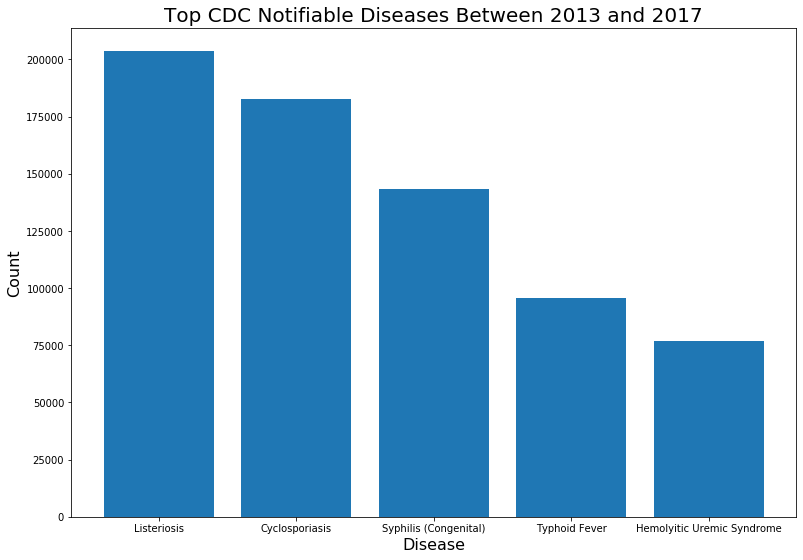

In [607]:
#Bar chart for each top disease
plt.figure(figsize = [13, 9])
locations = [1, 2, 3, 4, 5]
heights = [Listeriosis, Cyclosporiasis, Congenital_syphilis, Typhoid_fever, Hemolytic_uremic]
labels = ['Listeriosis', 'Cyclosporiasis', 'Syphilis (Congenital)', 'Typhoid Fever', 'Hemolyitic Uremic Syndrome']
plt.bar(locations, heights, tick_label=labels, align = 'center')
plt.xticks(rotation=0)
plt.title('Top CDC Notifiable Diseases Between 2013 and 2017', fontsize = 20)
plt.xlabel('Disease', fontsize = 16)
plt.ylabel('Count', fontsize = 16);

The top 5 diseases according to the CDC are: Liseriosis, Cyclosporiasis, Syphilis, Typhoid Fever, and Hemolytic Uremia.

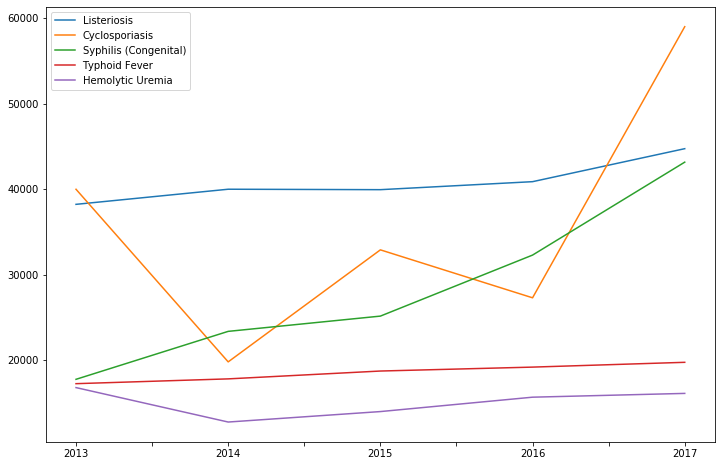

In [608]:
#Chart of diseases by year
top_df18_yrs = pd.DataFrame({
    '2013': [38220.0, 39984.0, 17748.0, 17238.0, 16779.0],
    '2014': [39988.0, 19788.0, 23358.0, 17799.0, 12750.0],
    '2015': [39936.0, 32895.0, 25143.0, 18717.0, 13974.0],
    '2016': [40872.0, 27285.0, 32283.0, 19176.0, 15657.0],
    '2017': [44732.0, 59005.0, 43156.0, 19737.0, 16100.0]},
    index= ['Listeriosis', 'Cyclosporiasis', 'Syphilis (Congenital)', 'Typhoid Fever', 'Hemolytic Uremia'])
top_df18_yrs.T.plot(figsize = [12, 8]);

Listeriosis seems to maintain a high level of occurence throughout the years, without much fluctuation. Cyclosporiasis has a more fluctuation, starting around 40,000 in 2013, then decreasing to 20,000 the next year, and continues to have peaks and valleys until spiking up to approximately 60,000 in 2017.

In [609]:
# Original clean dataframe
df18

,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
1,"Arboviral diseases, neuroinvasive and nonneur...",1.0,0.0,0.0,896.0,247.0,115.0
2,"Arboviral diseases, neuroinvasive and nonneur...",1.0,8.0,8.0,6.0,7.0,3.0
3,"Arboviral diseases, neuroinvasive and nonneur...",1.0,22.0,11.0,11.0,15.0,67.0
4,"Arboviral diseases, neuroinvasive and nonneur...",1.0,85.0,80.0,55.0,35.0,44.0
5,"Arboviral diseases, neuroinvasive and nonneur...",1.0,12.0,8.0,7.0,22.0,31.0
...,...,...,...,...,...,...,...
3377,"Hemolytic uremic syndrome, postdiarrheal",52.0,329.0,250.0,274.0,307.0,338.0
3378,Listeriosis,52.0,735.0,769.0,768.0,786.0,887.0
3379,Plague,52.0,4.0,10.0,16.0,4.0,5.0
3380,"Haemophilus influenzae, invasive disease, age ...",52.0,34.0,39.0,167.0,187.0,203.0


In [610]:
#Copy original clean dataframe
df18_months = df18
df18_months

,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
1,"Arboviral diseases, neuroinvasive and nonneur...",1.0,0.0,0.0,896.0,247.0,115.0
2,"Arboviral diseases, neuroinvasive and nonneur...",1.0,8.0,8.0,6.0,7.0,3.0
3,"Arboviral diseases, neuroinvasive and nonneur...",1.0,22.0,11.0,11.0,15.0,67.0
4,"Arboviral diseases, neuroinvasive and nonneur...",1.0,85.0,80.0,55.0,35.0,44.0
5,"Arboviral diseases, neuroinvasive and nonneur...",1.0,12.0,8.0,7.0,22.0,31.0
...,...,...,...,...,...,...,...
3377,"Hemolytic uremic syndrome, postdiarrheal",52.0,329.0,250.0,274.0,307.0,338.0
3378,Listeriosis,52.0,735.0,769.0,768.0,786.0,887.0
3379,Plague,52.0,4.0,10.0,16.0,4.0,5.0
3380,"Haemophilus influenzae, invasive disease, age ...",52.0,34.0,39.0,167.0,187.0,203.0


In [611]:
#Added a year column to calculate month
df18_months['year_2013'] = 2013
df18_months

C:\Users\kelly\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017,year_2013
1,"Arboviral diseases, neuroinvasive and nonneur...",1.0,0.0,0.0,896.0,247.0,115.0,2013
2,"Arboviral diseases, neuroinvasive and nonneur...",1.0,8.0,8.0,6.0,7.0,3.0,2013
3,"Arboviral diseases, neuroinvasive and nonneur...",1.0,22.0,11.0,11.0,15.0,67.0,2013
4,"Arboviral diseases, neuroinvasive and nonneur...",1.0,85.0,80.0,55.0,35.0,44.0,2013
5,"Arboviral diseases, neuroinvasive and nonneur...",1.0,12.0,8.0,7.0,22.0,31.0,2013
...,...,...,...,...,...,...,...,...
3377,"Hemolytic uremic syndrome, postdiarrheal",52.0,329.0,250.0,274.0,307.0,338.0,2013
3378,Listeriosis,52.0,735.0,769.0,768.0,786.0,887.0,2013
3379,Plague,52.0,4.0,10.0,16.0,4.0,5.0,2013
3380,"Haemophilus influenzae, invasive disease, age ...",52.0,34.0,39.0,167.0,187.0,203.0,2013


In [612]:
#Calculated month and year in new column
df18_months['week_year'] = df18.year_2013*1000+df18.mmwr_week*7-6 
df18['month'] = pd.to_datetime(df18['week_year'], format='%Y%j')

df18_months

C:\Users\kelly\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kelly\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017,year_2013,week_year,month
1,"Arboviral diseases, neuroinvasive and nonneur...",1.0,0.0,0.0,896.0,247.0,115.0,2013,2013001.0,2013-01-01
2,"Arboviral diseases, neuroinvasive and nonneur...",1.0,8.0,8.0,6.0,7.0,3.0,2013,2013001.0,2013-01-01
3,"Arboviral diseases, neuroinvasive and nonneur...",1.0,22.0,11.0,11.0,15.0,67.0,2013,2013001.0,2013-01-01
4,"Arboviral diseases, neuroinvasive and nonneur...",1.0,85.0,80.0,55.0,35.0,44.0,2013,2013001.0,2013-01-01
5,"Arboviral diseases, neuroinvasive and nonneur...",1.0,12.0,8.0,7.0,22.0,31.0,2013,2013001.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
3377,"Hemolytic uremic syndrome, postdiarrheal",52.0,329.0,250.0,274.0,307.0,338.0,2013,2013358.0,2013-12-24
3378,Listeriosis,52.0,735.0,769.0,768.0,786.0,887.0,2013,2013358.0,2013-12-24
3379,Plague,52.0,4.0,10.0,16.0,4.0,5.0,2013,2013358.0,2013-12-24
3380,"Haemophilus influenzae, invasive disease, age ...",52.0,34.0,39.0,167.0,187.0,203.0,2013,2013358.0,2013-12-24


In [613]:
#Added a month column based on new date
df18_months['month'] = pd.DatetimeIndex(df18_months['month']).month

df18_months

C:\Users\kelly\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,disease,mmwr_week,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017,year_2013,week_year,month
1,"Arboviral diseases, neuroinvasive and nonneur...",1.0,0.0,0.0,896.0,247.0,115.0,2013,2013001.0,1
2,"Arboviral diseases, neuroinvasive and nonneur...",1.0,8.0,8.0,6.0,7.0,3.0,2013,2013001.0,1
3,"Arboviral diseases, neuroinvasive and nonneur...",1.0,22.0,11.0,11.0,15.0,67.0,2013,2013001.0,1
4,"Arboviral diseases, neuroinvasive and nonneur...",1.0,85.0,80.0,55.0,35.0,44.0,2013,2013001.0,1
5,"Arboviral diseases, neuroinvasive and nonneur...",1.0,12.0,8.0,7.0,22.0,31.0,2013,2013001.0,1
...,...,...,...,...,...,...,...,...,...,...
3377,"Hemolytic uremic syndrome, postdiarrheal",52.0,329.0,250.0,274.0,307.0,338.0,2013,2013358.0,12
3378,Listeriosis,52.0,735.0,769.0,768.0,786.0,887.0,2013,2013358.0,12
3379,Plague,52.0,4.0,10.0,16.0,4.0,5.0,2013,2013358.0,12
3380,"Haemophilus influenzae, invasive disease, age ...",52.0,34.0,39.0,167.0,187.0,203.0,2013,2013358.0,12


In [614]:
#Reorder columns in new dataset
df18_months = df18_months[['disease', 'month', 'total_cases_2013', 'total_cases_2014', 'total_cases_2015', 'total_cases_2016', 'total_cases_2017']]
df18_months

,disease,month,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
1,"Arboviral diseases, neuroinvasive and nonneur...",1,0.0,0.0,896.0,247.0,115.0
2,"Arboviral diseases, neuroinvasive and nonneur...",1,8.0,8.0,6.0,7.0,3.0
3,"Arboviral diseases, neuroinvasive and nonneur...",1,22.0,11.0,11.0,15.0,67.0
4,"Arboviral diseases, neuroinvasive and nonneur...",1,85.0,80.0,55.0,35.0,44.0
5,"Arboviral diseases, neuroinvasive and nonneur...",1,12.0,8.0,7.0,22.0,31.0
...,...,...,...,...,...,...,...
3377,"Hemolytic uremic syndrome, postdiarrheal",12,329.0,250.0,274.0,307.0,338.0
3378,Listeriosis,12,735.0,769.0,768.0,786.0,887.0
3379,Plague,12,4.0,10.0,16.0,4.0,5.0
3380,"Haemophilus influenzae, invasive disease, age ...",12,34.0,39.0,167.0,187.0,203.0


In [615]:
#Filtered the top 5 disease from previous analyses
df18_months = df18_months[df18_months["disease"].isin(["Listeriosis", "Cyclosporiasis", "Syphilis, congenital", "Typhoid fever", "Hemolytic uremic syndrome, postdiarrheal"])]
df18_months

,disease,month,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
15,Cyclosporiasis,1,784.0,388.0,645.0,535.0,1094.0
24,"Hemolytic uremic syndrome, postdiarrheal",1,329.0,250.0,274.0,307.0,251.0
28,Listeriosis,1,735.0,769.0,768.0,786.0,737.0
47,"Syphilis, congenital",1,348.0,458.0,493.0,633.0,605.0
51,Typhoid fever,1,338.0,349.0,367.0,376.0,291.0
...,...,...,...,...,...,...,...
3353,Typhoid fever,12,338.0,349.0,367.0,376.0,419.0
3355,"Syphilis, congenital",12,348.0,458.0,493.0,633.0,918.0
3369,Cyclosporiasis,12,784.0,388.0,645.0,535.0,1194.0
3377,"Hemolytic uremic syndrome, postdiarrheal",12,329.0,250.0,274.0,307.0,338.0


In [616]:
#Filtered out disease totals by month
df18_months = df18_months.groupby(['month', 'disease'], as_index=False).sum()
df18_months

,month,disease,total_cases_2013,total_cases_2014,total_cases_2015,total_cases_2016,total_cases_2017
0,1,Cyclosporiasis,3920.0,1940.0,3225.0,2675.0,5446.0
1,1,"Hemolytic uremic syndrome, postdiarrheal",1645.0,1250.0,1370.0,1535.0,1400.0
2,1,Listeriosis,3675.0,3845.0,3840.0,3930.0,3773.0
3,1,"Syphilis, congenital",1740.0,2290.0,2465.0,3165.0,3205.0
4,1,Typhoid fever,1690.0,1745.0,1835.0,1880.0,1519.0
5,2,Cyclosporiasis,3136.0,1552.0,2580.0,2140.0,4494.0
6,2,"Hemolytic uremic syndrome, postdiarrheal",1316.0,1000.0,1096.0,1228.0,1163.0
7,2,Listeriosis,2940.0,3076.0,3072.0,3144.0,3181.0
8,2,"Syphilis, congenital",1392.0,1832.0,1972.0,2532.0,2837.0
9,2,Typhoid fever,1352.0,1396.0,1468.0,1504.0,1359.0


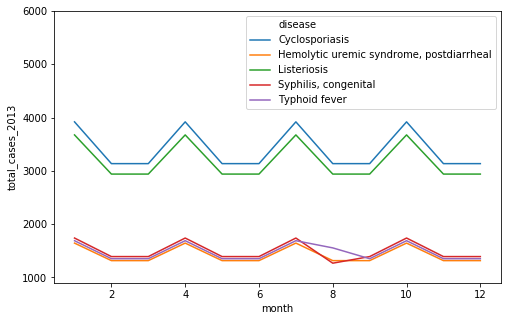

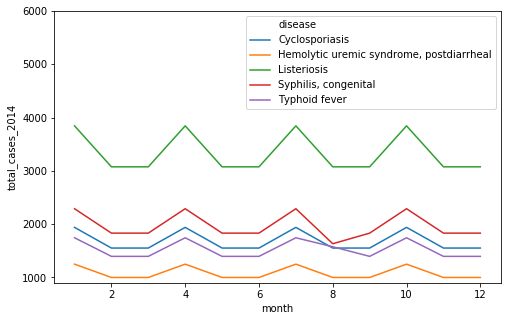

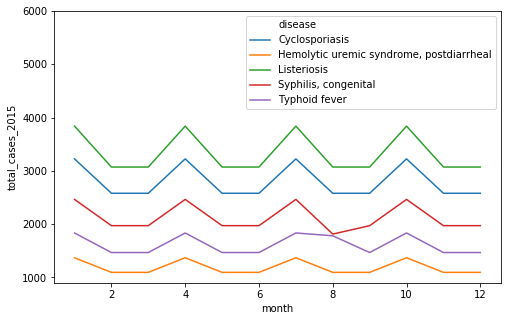

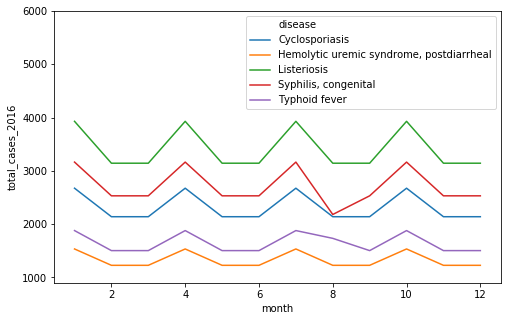

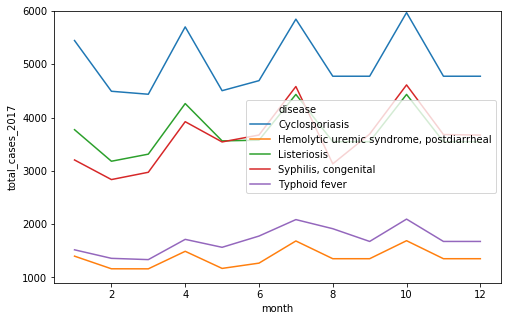

In [618]:
#Plot top diseases by month
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.lineplot(data=df18_months, x='month', y='total_cases_2013', hue='disease')
ax.set(ylim=(900, 6000))

fig, ax = plt.subplots(figsize=(8,5))
ax=sns.lineplot(data=df18_months, x='month', y='total_cases_2014', hue='disease')
ax.set(ylim=(900, 6000))

fig, ax = plt.subplots(figsize=(8,5))
ax=sns.lineplot(data=df18_months, x='month', y='total_cases_2015', hue='disease')
ax.set(ylim=(900, 6000))

fig, ax = plt.subplots(figsize=(8,5))
ax=sns.lineplot(data=df18_months, x='month', y='total_cases_2016', hue='disease')
ax.set(ylim=(900, 6000))

fig, ax = plt.subplots(figsize=(8,5))
ax=sns.lineplot(data=df18_months, x='month', y='total_cases_2017', hue='disease')
ax.set(ylim=(900, 6000));